In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows',500)
from sklearn.preprocessing import LabelEncoder

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler






In [108]:
train=pd.read_csv("house_prediction/train.csv")

In [109]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
train.shape

(1460, 81)

In [111]:
train.drop("Id",axis=1,inplace=True)

In [112]:
# finding missing value colomns

for i in train.columns:
    if train[i].isnull().sum() > 0:
        print(i)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [113]:
# or

nullcol=[i for i in train.columns if train[i].isnull().sum() > 0]
nullcol

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [114]:
# percentage of missing value
#np.round(2)>>>>>>point kazhinj 2 value varum


train_null_percentage=train.apply(lambda x: np.round(100*x.isnull().sum()/train.shape[0],2))


null_count=train.isnull().sum()



In [115]:

train_null_percentage

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [116]:
null_count

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [117]:
pd.DataFrame([train_null_percentage,null_count])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0,0.0,17.74,0.0,0.0,93.77,0.0,0.0,0.0,0.0,...,0.0,99.52,80.75,96.3,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,259.00,0.0,0.0,1369.00,0.0,0.0,0.0,0.0,...,0.0,1453.00,1179.00,1406.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
train_null_df=pd.DataFrame([train_null_percentage,null_count]).T    # t>>>transpose
train_null_df

,0,1
MSSubClass,0.00,0.0
MSZoning,0.00,0.0
LotFrontage,17.74,259.0
LotArea,0.00,0.0
Street,0.00,0.0
Alley,93.77,1369.0
LotShape,0.00,0.0
LandContour,0.00,0.0
Utilities,0.00,0.0
LotConfig,0.00,0.0


In [119]:
train_null_df.columns=['Null_percentage','Null_values']
train_null_df

,Null_percentage,Null_values
MSSubClass,0.00,0.0
MSZoning,0.00,0.0
LotFrontage,17.74,259.0
LotArea,0.00,0.0
Street,0.00,0.0
Alley,93.77,1369.0
LotShape,0.00,0.0
LandContour,0.00,0.0
Utilities,0.00,0.0
LotConfig,0.00,0.0


In [120]:
train_null_df.sort_values(by='Null_values',ascending=False,inplace=True)
train_null_df

,Null_percentage,Null_values
PoolQC,99.52,1453.0
MiscFeature,96.30,1406.0
Alley,93.77,1369.0
Fence,80.75,1179.0
FireplaceQu,47.26,690.0
LotFrontage,17.74,259.0
GarageYrBlt,5.55,81.0
GarageCond,5.55,81.0
GarageType,5.55,81.0
GarageFinish,5.55,81.0


In [121]:
train_null_df.reset_index(inplace=True)



In [122]:
train_null_df.head()

,index,Null_percentage,Null_values
0,PoolQC,99.52,1453.0
1,MiscFeature,96.30,1406.0
2,Alley,93.77,1369.0
3,Fence,80.75,1179.0
4,FireplaceQu,47.26,690.0


In [123]:
# we are dropping coloms more than 50 percentage null value

train.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1,inplace=True)

In [124]:
# drop cheythath original dataset il ninna ath train_null_df reflect aakan veedum repeat cheyyuka

train_null_percentage=train.apply(lambda x: np.round(100*x.isnull().sum()/train.shape[0],2))

null_count=train.isnull().sum()

train_null_df=pd.DataFrame([train_null_percentage,null_count]).T

train_null_df.columns=['Null_percentage','Null_values']
train_null_df.sort_values(by='Null_values',ascending=False,inplace=True)
train_null_df.reset_index(inplace=True)

In [125]:
train_null_df

,index,Null_percentage,Null_values
0,LotFrontage,17.74,259.0
1,GarageType,5.55,81.0
2,GarageYrBlt,5.55,81.0
3,GarageFinish,5.55,81.0
4,GarageQual,5.55,81.0
5,GarageCond,5.55,81.0
6,BsmtFinType2,2.60,38.0
7,BsmtExposure,2.60,38.0
8,BsmtQual,2.53,37.0
9,BsmtCond,2.53,37.0


In [126]:
# null value rows slice cheyyunnu

train_null_df[:14]

,index,Null_percentage,Null_values
0,LotFrontage,17.74,259.0
1,GarageType,5.55,81.0
2,GarageYrBlt,5.55,81.0
3,GarageFinish,5.55,81.0
4,GarageQual,5.55,81.0
5,GarageCond,5.55,81.0
6,BsmtFinType2,2.60,38.0
7,BsmtExposure,2.60,38.0
8,BsmtQual,2.53,37.0
9,BsmtCond,2.53,37.0


In [127]:
train_null_df[:14]["index"]  # ithil index and value und namuk value mathram mathi so we are changing it into a numpy array

0      LotFrontage
1       GarageType
2      GarageYrBlt
3     GarageFinish
4       GarageQual
5       GarageCond
6     BsmtFinType2
7     BsmtExposure
8         BsmtQual
9         BsmtCond
10    BsmtFinType1
11      MasVnrArea
12      MasVnrType
13      Electrical
Name: index, dtype: object

In [128]:
nullcoloms=np.array(train_null_df[:14]["index"])  # ippo array of list aayi

In [129]:
nullcoloms

array(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [130]:
# missing value replace

for column in nullcoloms:
    if train[column].dtype=="object":
        print(column)
    else:
        print(f"{column} this is numeric")

LotFrontage this is numeric
GarageType
GarageYrBlt this is numeric
GarageFinish
GarageQual
GarageCond
BsmtFinType2
BsmtExposure
BsmtQual
BsmtCond
BsmtFinType1
MasVnrArea this is numeric
MasVnrType
Electrical


In [131]:
for column in nullcoloms:
    if train[column].dtype=="object":
        print(column)
        train[column].fillna(train[column].mode()[0],inplace=True)
    else:
        print(f"{column} this is numeric")
        train[column].fillna(train[column].median(),inplace=True)

LotFrontage this is numeric
GarageType
GarageYrBlt this is numeric
GarageFinish
GarageQual
GarageCond
BsmtFinType2
BsmtExposure
BsmtQual
BsmtCond
BsmtFinType1
MasVnrArea this is numeric
MasVnrType
Electrical


In [132]:
#  cheythath original dataset il ninna ath train_null_df reflect aakan veedum repeat cheyyuka

train_null_percentage=train.apply(lambda x: np.round(100*x.isnull().sum()/train.shape[0],2))

null_count=train.isnull().sum()

train_null_df=pd.DataFrame([train_null_percentage,null_count]).T

train_null_df.columns=['Null_percentage','Null_values']
train_null_df.sort_values(by='Null_values',ascending=False,inplace=True)
train_null_df.reset_index(inplace=True)
train_null_df.head(10)

,index,Null_percentage,Null_values
0,MSSubClass,0.0,0.0
1,GarageYrBlt,0.0,0.0
2,Fireplaces,0.0,0.0
3,Functional,0.0,0.0
4,TotRmsAbvGrd,0.0,0.0
5,KitchenQual,0.0,0.0
6,KitchenAbvGr,0.0,0.0
7,BedroomAbvGr,0.0,0.0
8,HalfBath,0.0,0.0
9,FullBath,0.0,0.0


In [133]:
# we are going to plot numerical colom

numerical_col=train.select_dtypes(include=np.number).columns


numerical_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [134]:
object_col=train.select_dtypes(include=np.object).columns


object_col

C:\Users\sharo\AppData\Local\Temp/ipykernel_7288/3643884209.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  object_col=train.select_dtypes(include=np.object).columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

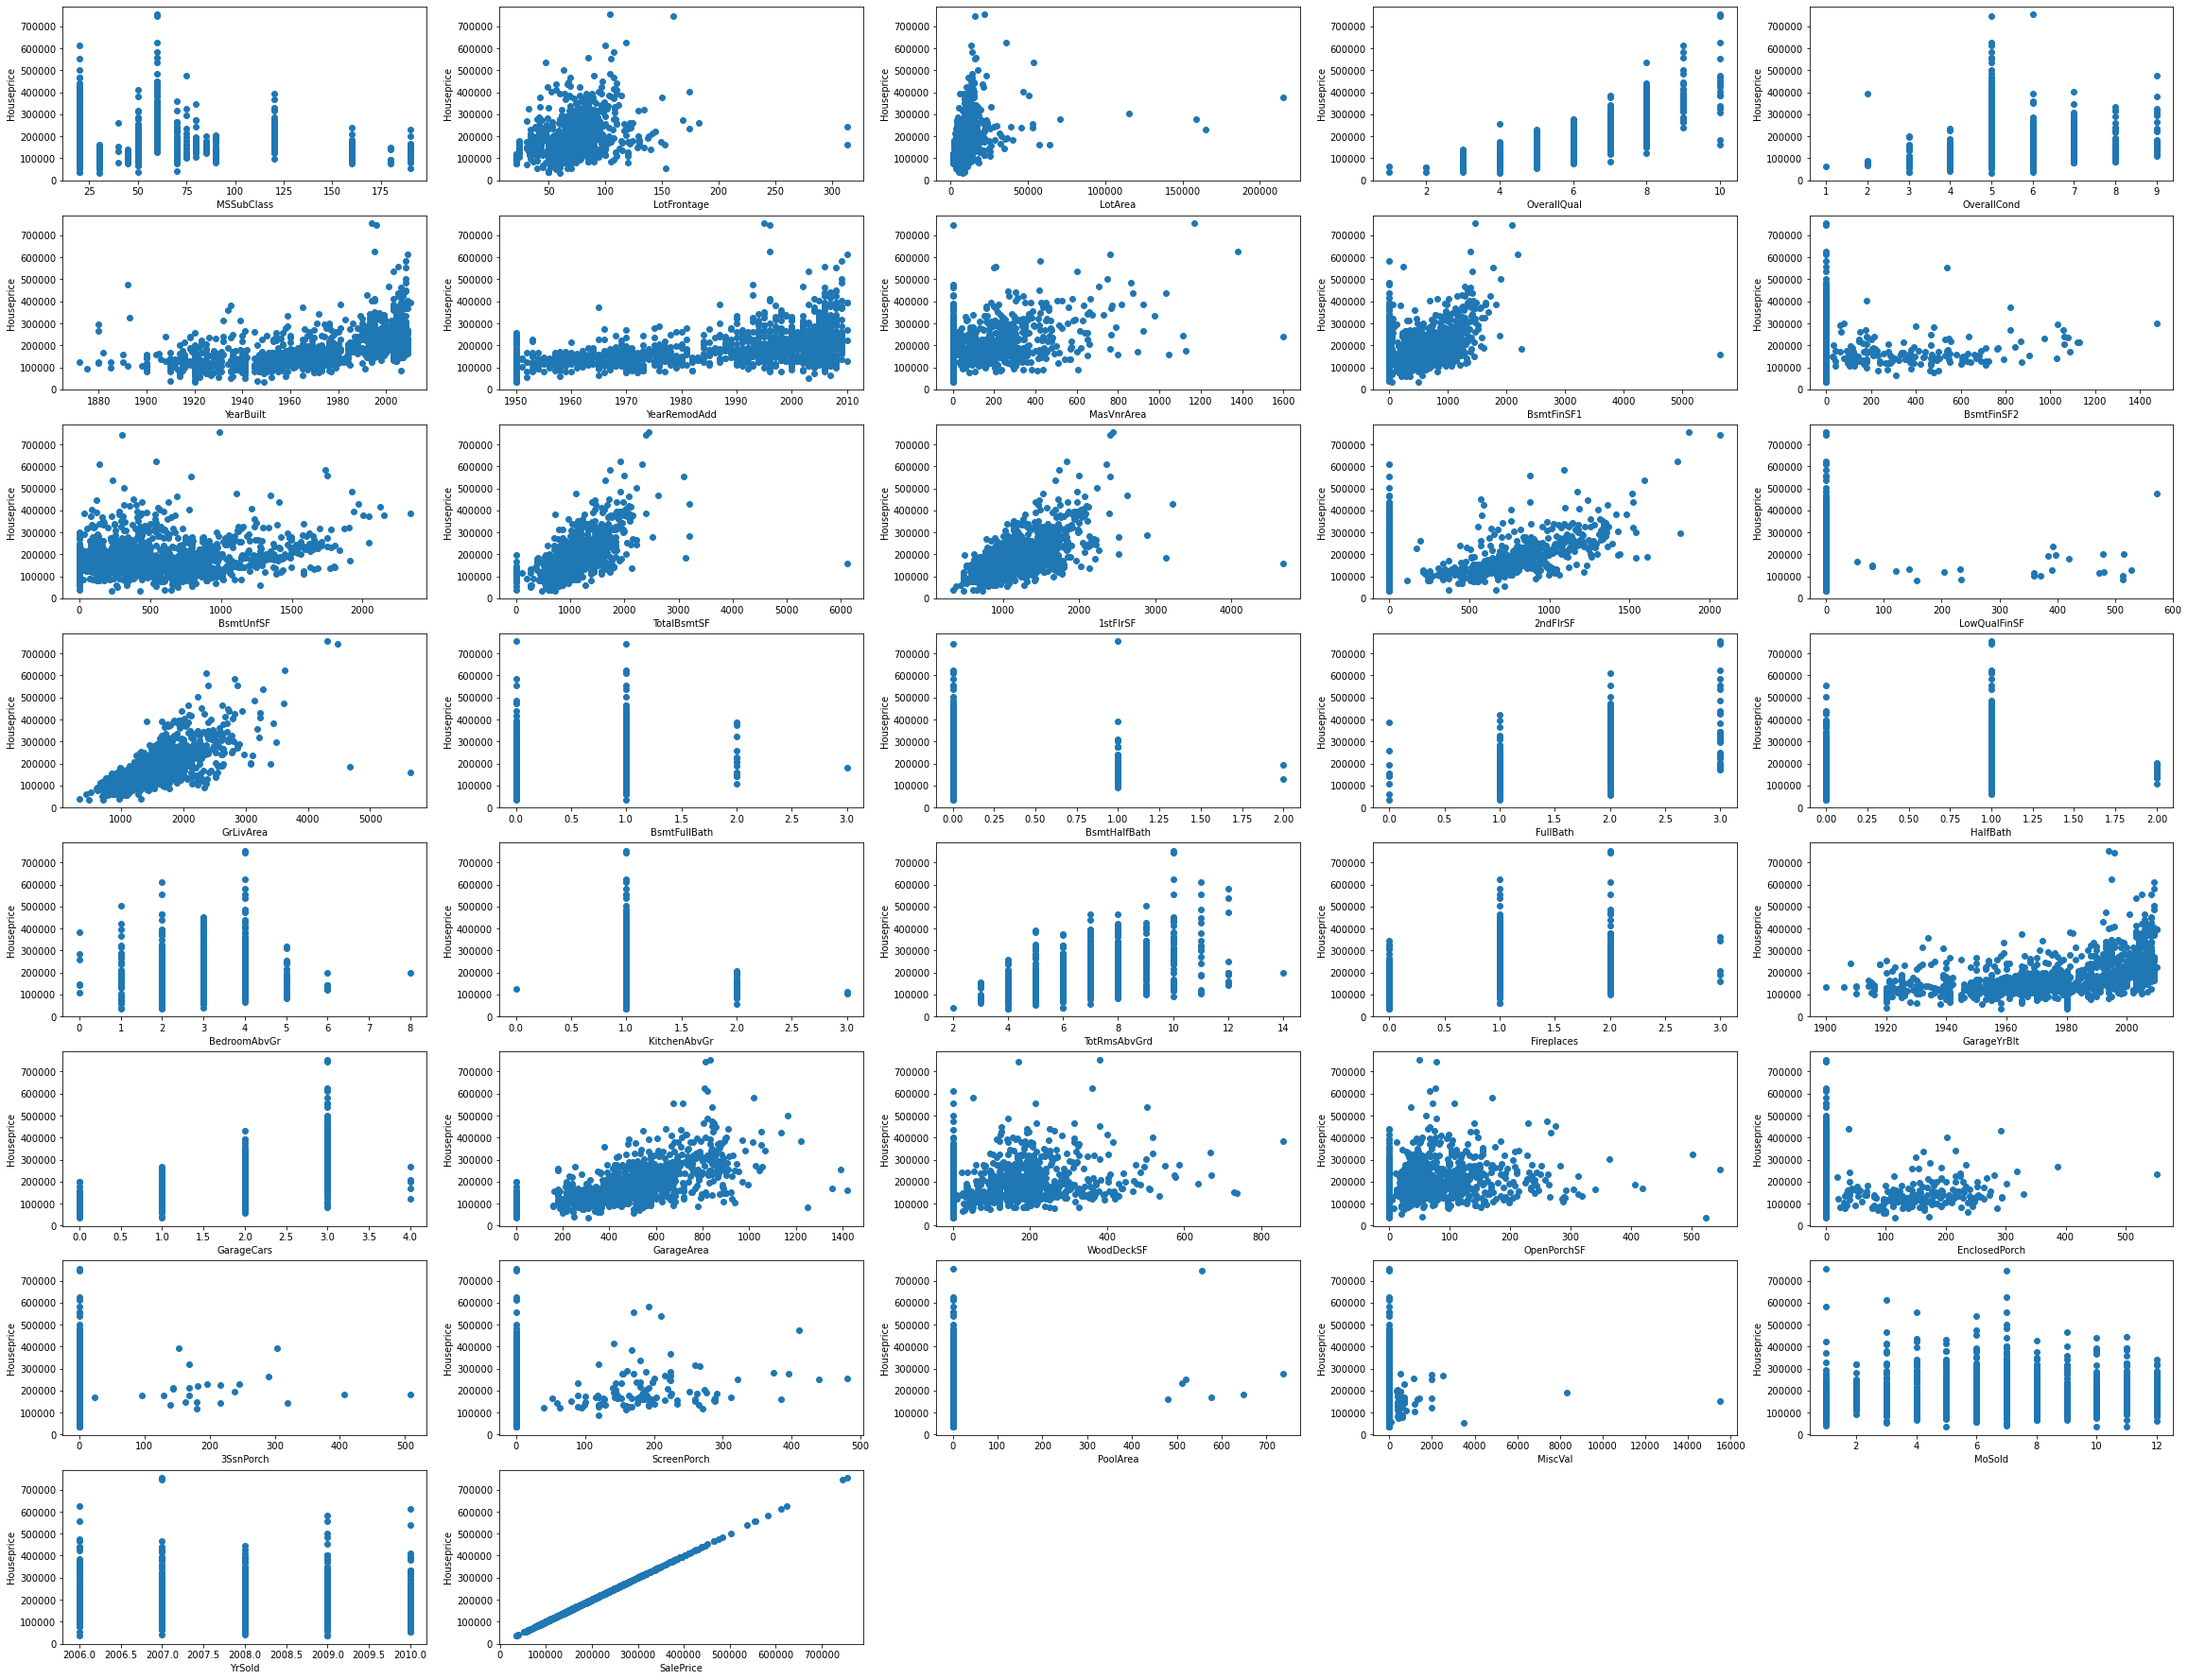

In [135]:
# we are going to plot numerical colom

j=0
plt.figure(figsize=(40,40))
for column in numerical_col:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])   # sales price continuous aan ath kondan ee plotting
    plt.xlabel(column)
    plt.ylabel("Houseprice")
    j+=1

In [136]:
# we are finding continuous and descrete columns from numerical columns

desc_col=[]
continuos_col=[]

for col in numerical_col:
    if train[col].nunique()>20:
        continuos_col.append(col)
    else:
        desc_col.append(col)

In [137]:
desc_col

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

In [138]:
continuos_col

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

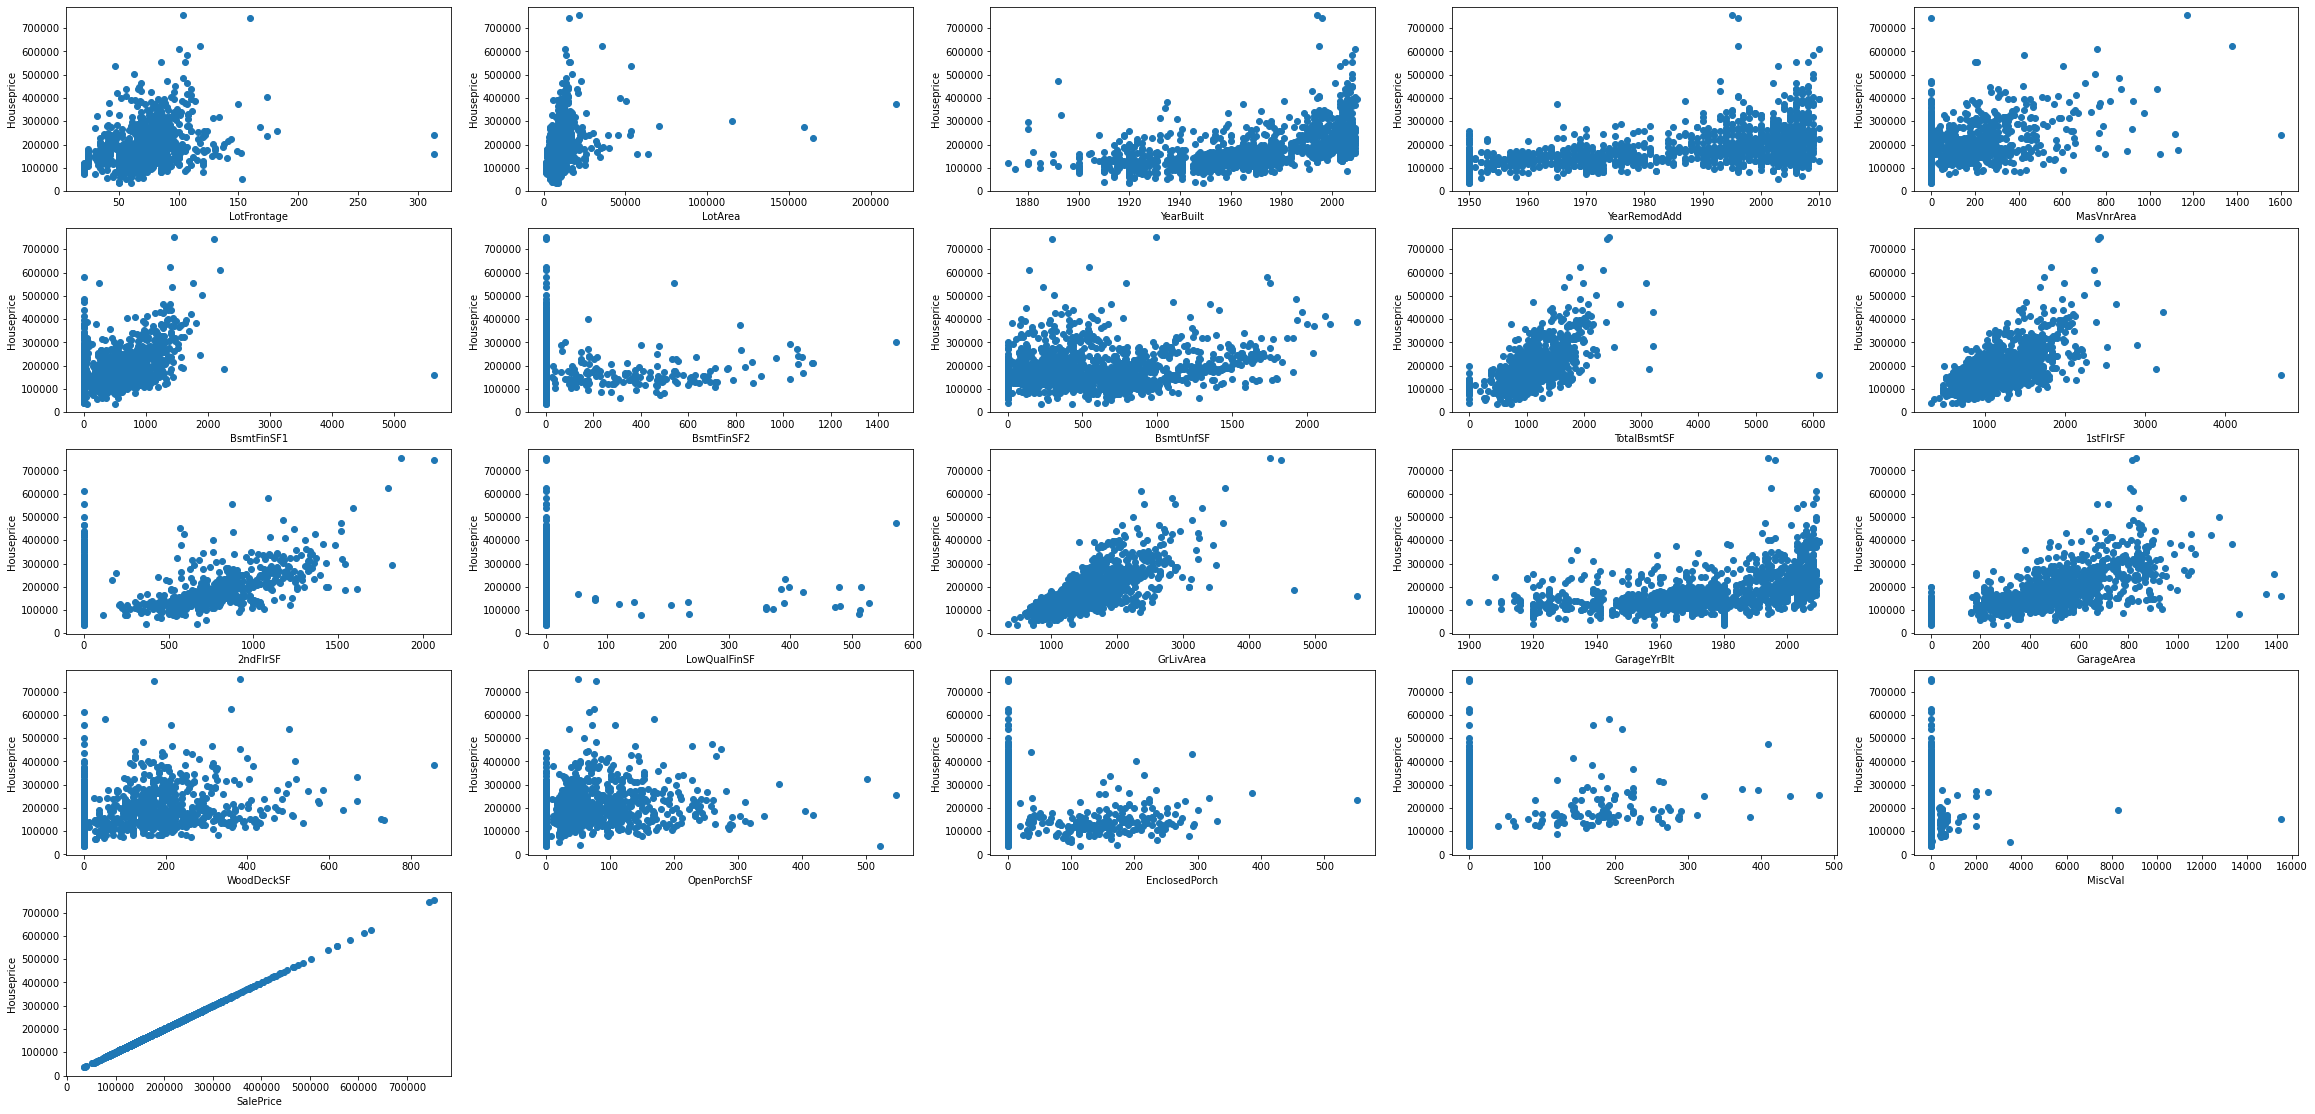

In [139]:
j=0
plt.figure(figsize=(40,40))
for column in continuos_col:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])   # continuous  aayath kondan scatter plote upayokichath
    plt.xlabel(column)
    plt.ylabel("Houseprice")
    j+=1

In [140]:
# descrete aayittulla colom plot cheyyan bar chart upayokikkuka,,barchart plot cheyyunnnath frequancy base cheyth aayirikkum

obseravation_value=train.groupby('MSSubClass')['SalePrice'].mean() # MSSubClass il 20 enna valuente corresponding aayi saleprice enna colothil varunna mean

In [141]:
obseravation_value

MSSubClass
20     185224.811567
30      95829.724638
40     156125.000000
45     108591.666667
50     143302.972222
60     239948.501672
70     166772.416667
75     192437.500000
80     169736.551724
85     147810.000000
90     133541.076923
120    200779.080460
160    138647.380952
180    102300.000000
190    129613.333333
Name: SalePrice, dtype: float64

In [142]:
#easy aayit plot cheyyan df aaki

observ_df=pd.DataFrame(obseravation_value).sort_values(by="SalePrice",ascending=False)
observ_df.reset_index(inplace=True)

In [143]:
observ_df

,MSSubClass,SalePrice
0,60,239948.501672
1,120,200779.080460
2,75,192437.500000
3,20,185224.811567
4,80,169736.551724
5,70,166772.416667
6,40,156125.000000
7,85,147810.000000
8,50,143302.972222
9,160,138647.380952


<BarContainer object of 15 artists>

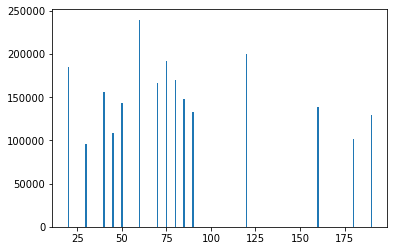

In [144]:
plt.bar(observ_df["MSSubClass"],observ_df["SalePrice"])

<BarContainer object of 1460 artists>

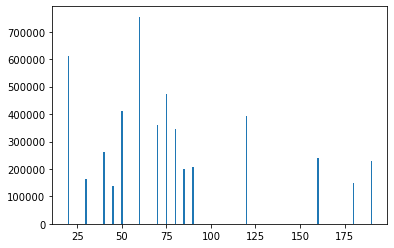

In [145]:
plt.bar(train["MSSubClass"],train["SalePrice"])  #these two are same i dont know why we find sum for descrete numercal colom

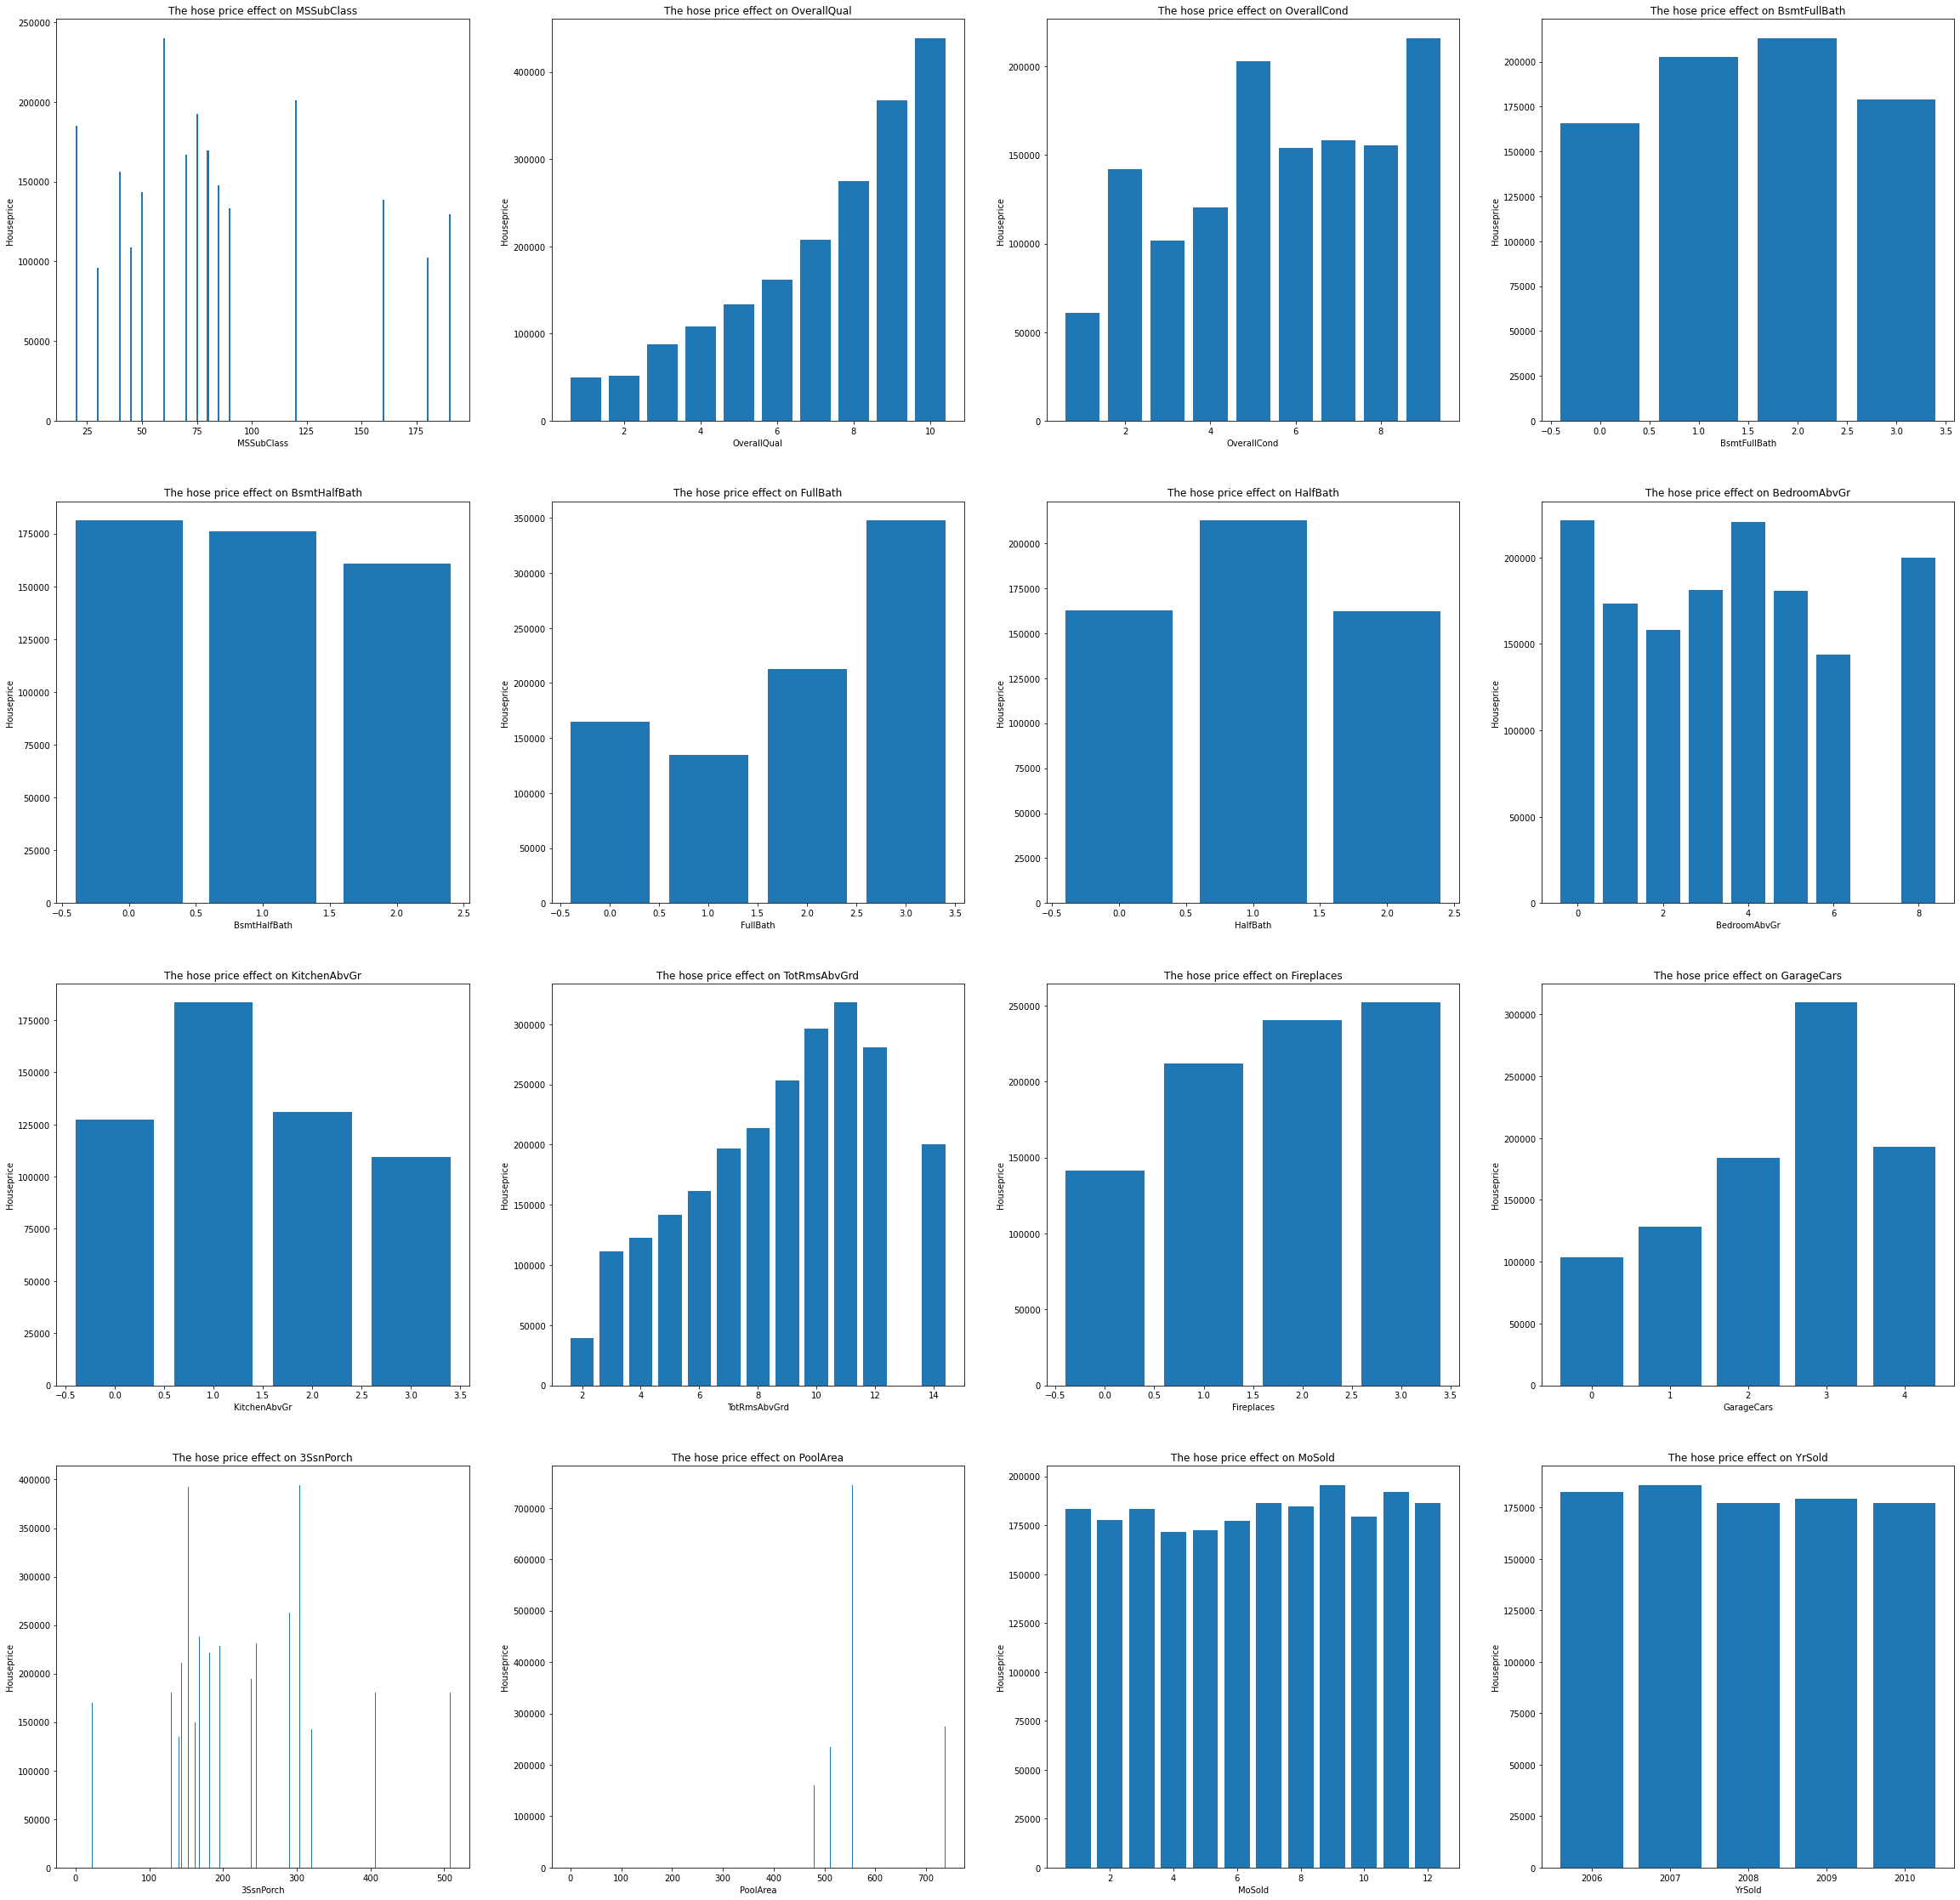

In [146]:
# creating a function for descrete columns

j=0
plt.figure(figsize=(40,40))
for column in desc_col:
    plt.subplot(4,4,j+1)   # 4 x 4=16 ee number inekkal valuth aakan padilla desc_col number
    obseravation_value=train.groupby(column)['SalePrice'].mean()
    observ_df=pd.DataFrame(obseravation_value).sort_values(by="SalePrice",ascending=False)
    observ_df.reset_index(inplace=True)

    
    plt.bar(observ_df[column],observ_df["SalePrice"])   
    plt.title(f"The hose price effect on {column}")
    plt.xlabel(column)
    plt.ylabel("Houseprice")
    j+=1

In [147]:
len(object_col)

38

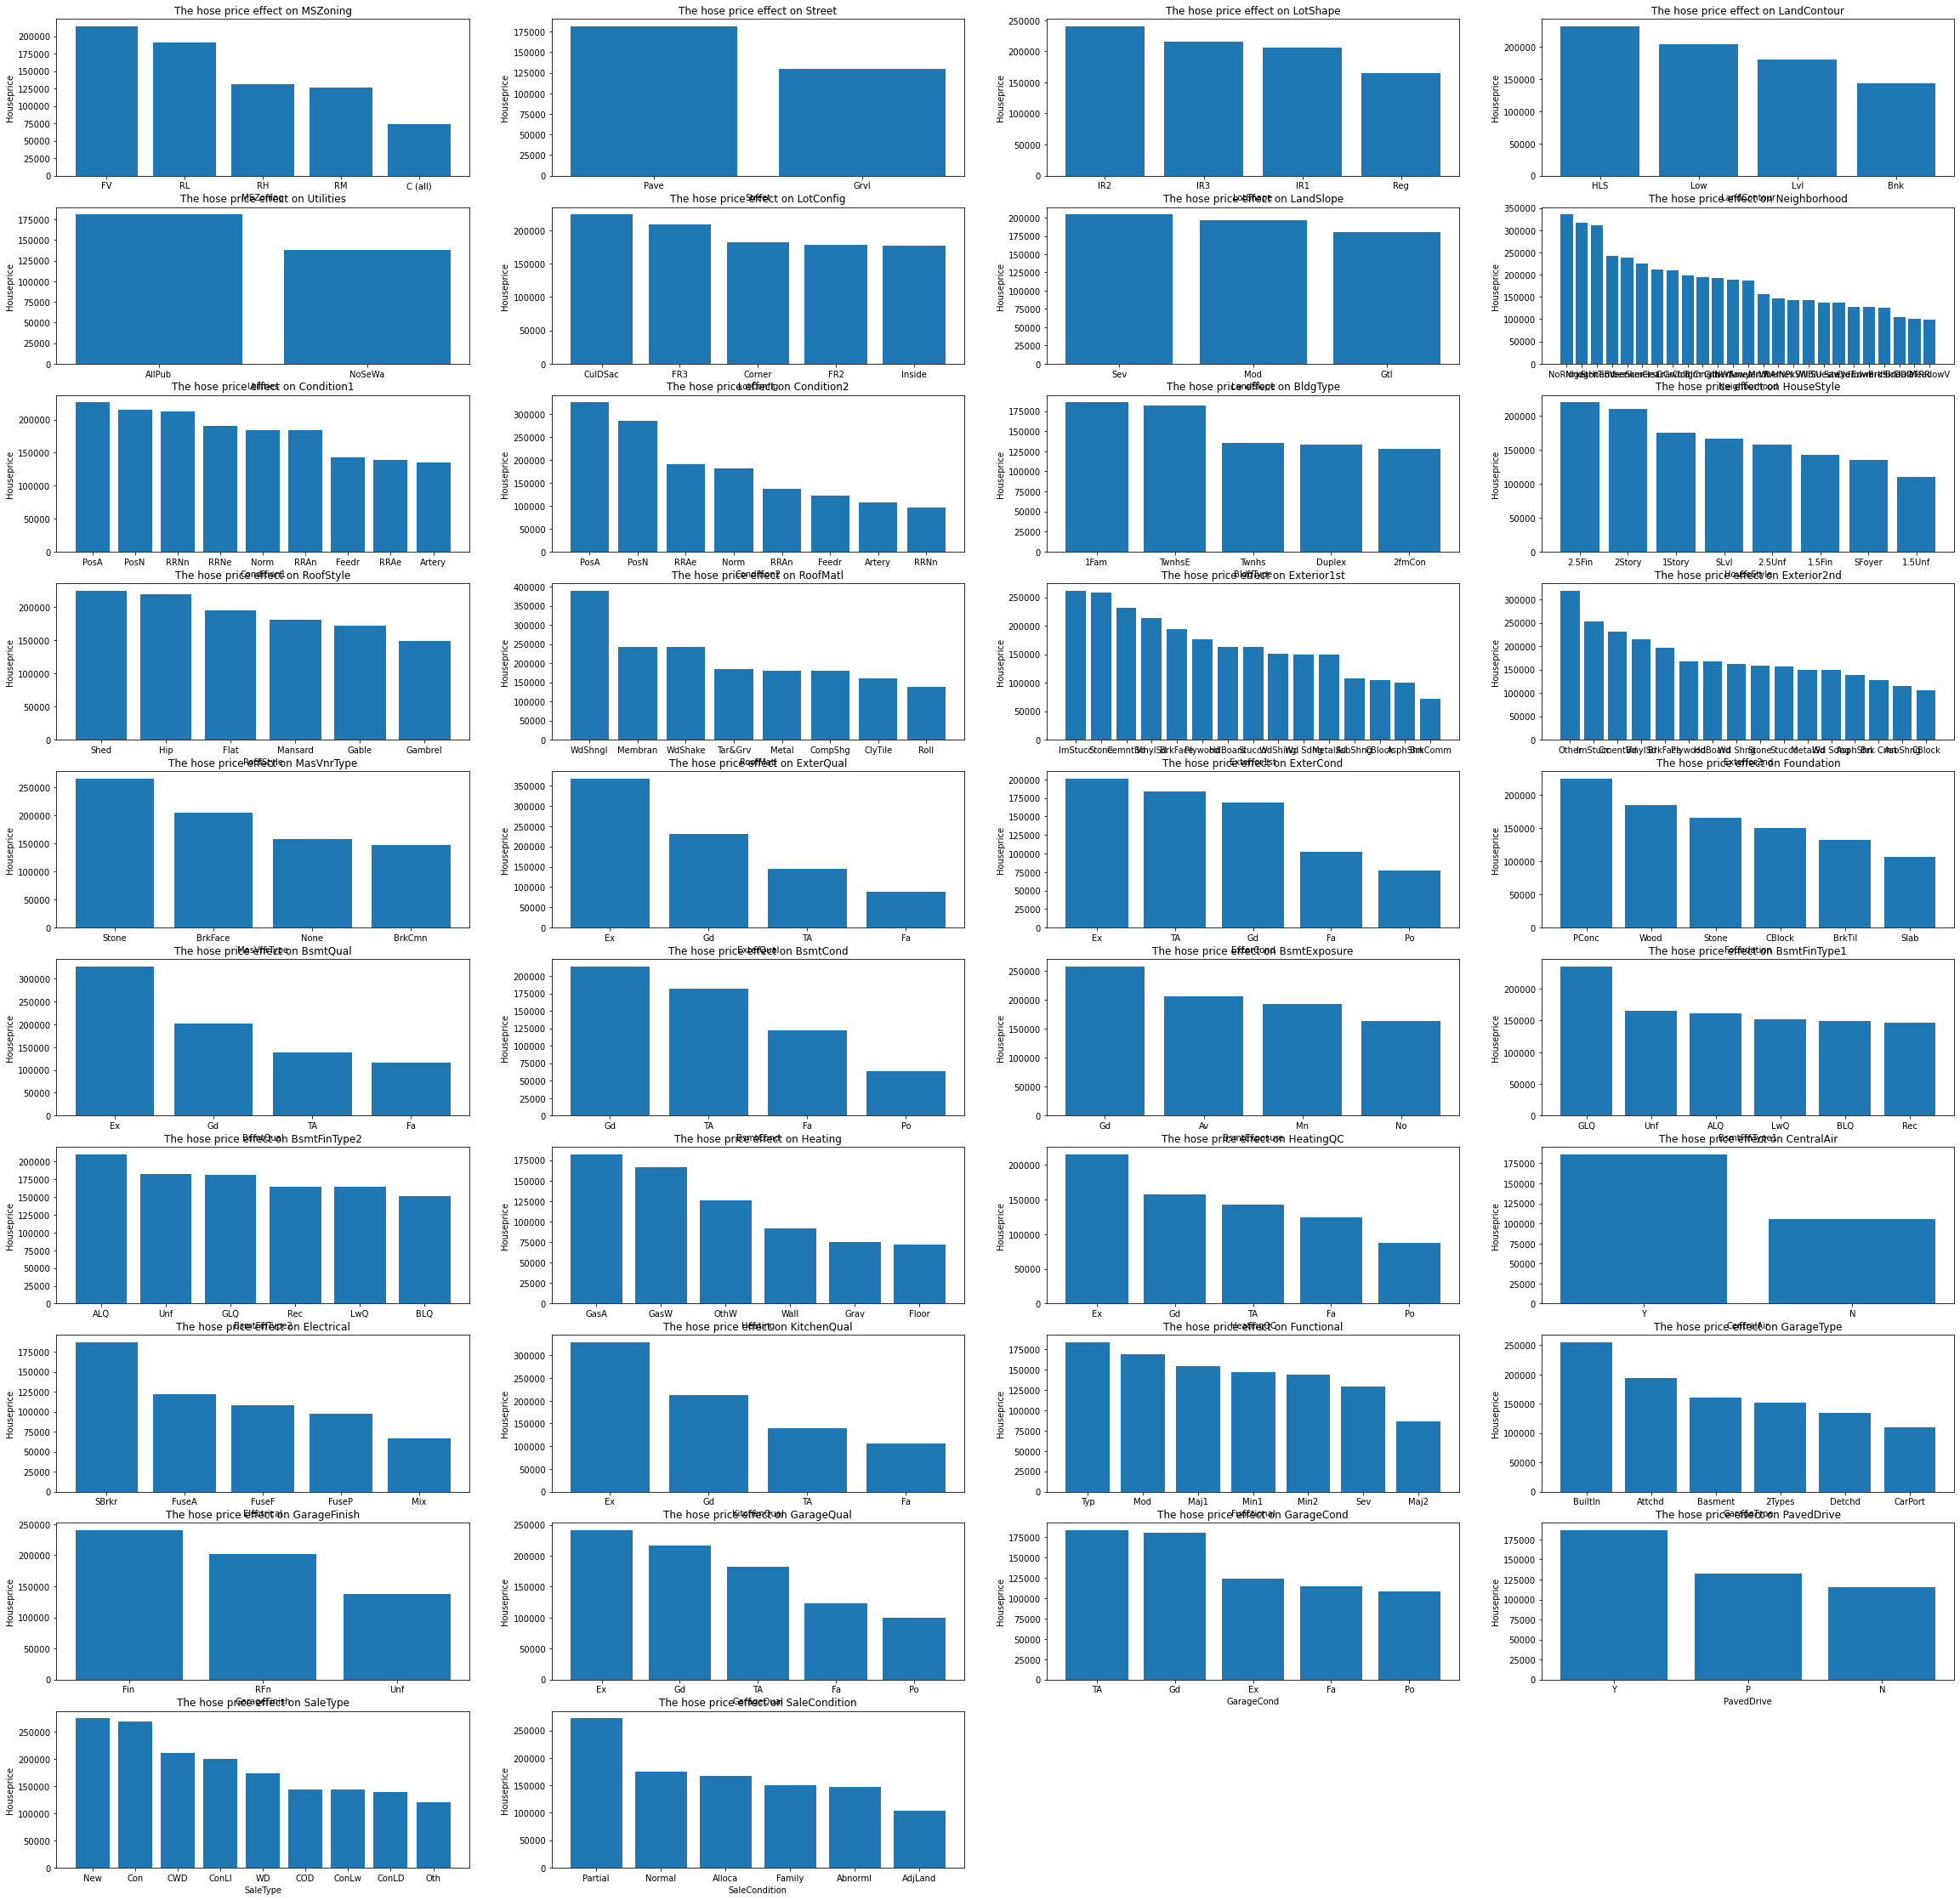

In [148]:
# ini object colom



j=0
plt.figure(figsize=(40,40))
for column in object_col:
    plt.subplot(10,4,j+1)   
    obseravation_value=train.groupby(column)['SalePrice'].mean()
    observ_df=pd.DataFrame(obseravation_value).sort_values(by="SalePrice",ascending=False)
    observ_df.reset_index(inplace=True)
    plt.bar(observ_df[column],observ_df["SalePrice"])   
    plt.title(f"The hose price effect on {column}")
    plt.xlabel(column)
    plt.ylabel("Houseprice")
    j+=1

### handling outlayers

In [149]:
continuos_col

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [150]:
upper_limit=train["LotFrontage"].mean()+train["LotFrontage"].std()*3
lower_limit=train["LotFrontage"].mean()-train["LotFrontage"].std()*3

In [151]:
upper_limit

135.9467298969942

In [152]:
lower_limit

3.780667363279747

In [153]:
train["LotFrontage"].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [154]:
train[(train["LotFrontage"] <= upper_limit)  &  (train["LotFrontage"] >= lower_limit)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [155]:
train.shape

(1460, 75)

In [156]:
1460-1185 

275

In [157]:
# capping

train.loc[(train["LotFrontage"]> upper_limit),"LotFrontage"] =upper_limit

In [158]:

train.loc[(train["LotFrontage"]> upper_limit),"LotFrontage"]   # no value

Series([], Name: LotFrontage, dtype: float64)

In [159]:
# lower limit in thazhe value illa so no minimum value capping ivide venda

In [160]:
# creating a for loop 

for col in continuos_col:
    upper_limit=train[col].mean()+train[col].std()*3
    lower_limit=train[col].mean()-train[col].std()*3

    train.loc[(train[col]> upper_limit),col] =upper_limit
    train.loc[(train[col]< lower_limit),col] =lower_limit

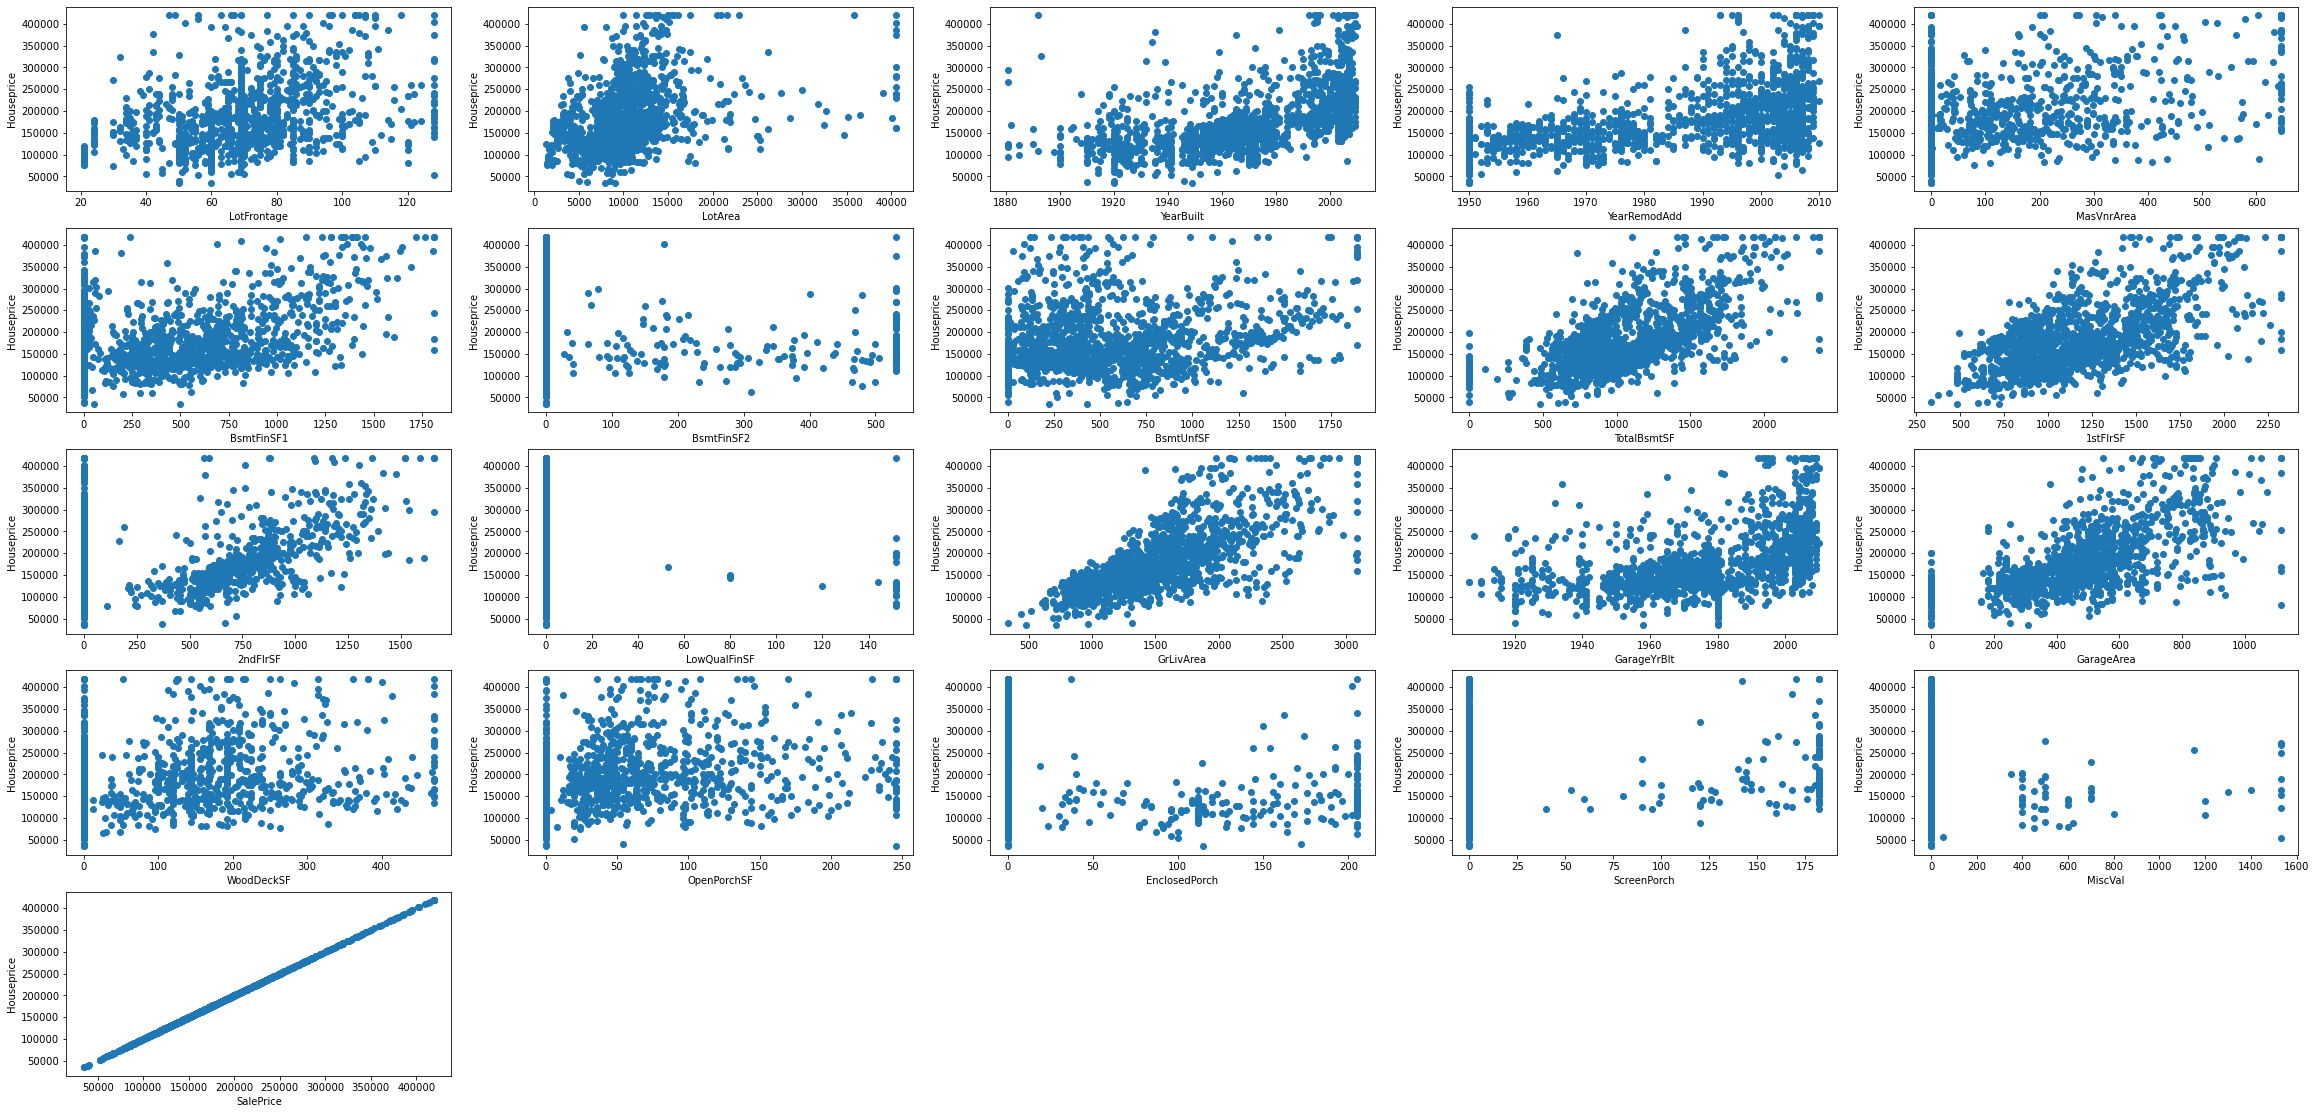

In [161]:
j=0
plt.figure(figsize=(40,40))
for column in continuos_col:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])   # ippo outlayers mariyath manasilakum
    plt.xlabel(column)
    plt.ylabel("Houseprice")
    j+=1

In [162]:
len(object_col)

38

In [163]:
train_obj_df=train[object_col]

In [164]:
# 38 colom label endoding is not easy so take this method

from collections import defaultdict
default_encoder=defaultdict(LabelEncoder)  #label encoding aayth kond

In [165]:
fit=train_obj_df.apply(lambda x:default_encoder[x.name].fit_transform(x))

In [166]:
fit

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [167]:
default_encoder["Street"].transform(["Pave"])  # value 1 kitti so it is working

array([1])

In [168]:
train_obj_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [169]:
# train data il fit add cheyyanam and train_obj_df  il ulla coloms trainil nin remove cheyyanam


train.drop(object_col,axis=1,inplace=True)

In [170]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.000000,0,0.0,0,0.0,2,2008,208500.0
1,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.000000,0,0.0,0,0.0,5,2007,181500.0
2,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.000000,0,0.0,0,0.0,9,2008,223500.0
3,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,205.311555,0,0.0,0,0.0,2,2006,140000.0
4,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.000000,0,0.0,0,0.0,12,2008,250000.0


In [171]:
updated_train=pd.concat([train,fit],axis=1)

In [172]:
updated_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.0,...,4,2,6,1,1,4,4,2,8,4
1,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.0,...,4,3,6,1,1,4,4,2,8,4
2,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.0,...,4,2,6,1,1,4,4,2,8,4
3,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.0,...,4,2,6,5,2,4,4,2,8,0
4,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.0,...,4,2,6,1,1,4,4,2,8,4


In [173]:
# correlation

cor_df=updated_train.corr()

In [174]:
cor_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
MSSubClass,1.000000,-0.400658,-0.279702,0.032628,-0.059316,0.027944,0.040581,0.020520,-0.073235,-0.066358,...,0.051945,0.010129,0.003711,0.090719,0.012301,0.007630,0.002927,-0.059925,0.012464,-0.024940
LotFrontage,-0.400658,1.000000,0.455607,0.237468,-0.059285,0.126277,0.076991,0.187109,0.146296,0.044964,...,0.063530,-0.185197,0.030656,-0.236666,-0.222537,0.051435,0.043985,0.097751,-0.033825,0.066170
LotArea,-0.279702,0.455607,1.000000,0.181943,-0.015925,0.037913,0.038069,0.153834,0.239187,0.082894,...,0.059112,-0.114712,-0.044227,-0.175576,-0.168933,0.019339,0.038518,0.014115,0.001833,0.045476
OverallQual,0.032628,0.237468,0.181943,1.000000,-0.091932,0.573183,0.550684,0.416804,0.230085,-0.085303,...,0.254127,-0.555348,0.161047,-0.297995,-0.538529,0.090562,0.144988,0.229393,-0.060472,0.193703
OverallCond,-0.059316,-0.059285,-0.015925,-0.091932,1.000000,-0.376205,0.073741,-0.131177,-0.044549,0.054472,...,0.062664,0.067984,0.094040,0.163126,0.191063,-0.094761,-0.032236,-0.062236,0.095267,0.017758
YearBuilt,0.027944,0.126277,0.037913,0.573183,-0.376205,1.000000,0.593659,0.328898,0.252930,-0.063908,...,0.338915,-0.359384,0.154651,-0.443934,-0.590385,0.304135,0.246913,0.427485,-0.052367,0.201311
YearRemodAdd,0.040581,0.076991,0.038069,0.550684,0.073741,0.593659,1.000000,0.182833,0.126435,-0.088854,...,0.344514,-0.452431,0.079903,-0.271764,-0.456786,0.130241,0.150579,0.168457,0.019647,0.221687
MasVnrArea,0.020520,0.187109,0.153834,0.416804,-0.131177,0.328898,0.182833,1.000000,0.250260,-0.076081,...,0.116759,-0.263543,0.092105,-0.178620,-0.278422,0.113714,0.071267,0.154841,-0.062240,0.085328
BsmtFinSF1,-0.073235,0.146296,0.239187,0.230085,-0.044549,0.252930,0.126435,0.250260,1.000000,-0.041027,...,0.157218,-0.178807,0.044579,-0.242146,-0.246545,0.127551,0.100624,0.197006,0.012959,0.027687
BsmtFinSF2,-0.066358,0.044964,0.082894,-0.085303,0.054472,-0.063908,-0.088854,-0.076081,-0.041027,1.000000,...,0.015672,0.079340,-0.108940,-0.016654,0.044394,0.045400,-0.008157,0.067335,-0.029363,-0.057059


In [175]:
cor_df["SalePrice"]

MSSubClass      -0.088248
LotFrontage      0.362129
LotArea          0.381589
OverallQual      0.810469
OverallCond     -0.079194
YearBuilt        0.550119
YearRemodAdd     0.534087
MasVnrArea       0.468188
BsmtFinSF1       0.398349
BsmtFinSF2      -0.039318
BsmtUnfSF        0.218271
TotalBsmtSF      0.649209
1stFlrSF         0.629285
2ndFlrSF         0.306770
LowQualFinSF    -0.052332
GrLivArea        0.722471
BsmtFullBath     0.239062
BsmtHalfBath    -0.026792
FullBath         0.569415
HalfBath         0.289295
BedroomAbvGr     0.169804
KitchenAbvGr    -0.143346
TotRmsAbvGrd     0.533566
Fireplaces       0.477834
GarageYrBlt      0.488076
GarageCars       0.663012
GarageArea       0.650517
WoodDeckSF       0.339119
OpenPorchSF      0.358735
EnclosedPorch   -0.152807
3SsnPorch        0.050598
ScreenPorch      0.100159
PoolArea         0.059439
MiscVal         -0.041144
MoSold           0.060833
YrSold          -0.029711
SalePrice        1.000000
MSZoning        -0.180951
Street      

In [176]:
new_cor=abs(cor_df["SalePrice"]).sort_values(ascending=False)  #absolute value -ve pokan
new_cor

SalePrice        1.000000
OverallQual      0.810469
GrLivArea        0.722471
GarageCars       0.663012
GarageArea       0.650517
TotalBsmtSF      0.649209
ExterQual        0.641007
1stFlrSF         0.629285
BsmtQual         0.624198
KitchenQual      0.590739
FullBath         0.569415
GarageFinish     0.558118
YearBuilt        0.550119
YearRemodAdd     0.534087
TotRmsAbvGrd     0.533566
GarageYrBlt      0.488076
Fireplaces       0.477834
MasVnrArea       0.468188
HeatingQC        0.417038
Foundation       0.400229
BsmtFinSF1       0.398349
LotArea          0.381589
LotFrontage      0.362129
OpenPorchSF      0.358735
WoodDeckSF       0.339119
GarageType       0.321506
2ndFlrSF         0.306770
BsmtExposure     0.298020
HalfBath         0.289295
CentralAir       0.267532
LotShape         0.261493
Electrical       0.249019
PavedDrive       0.245371
BsmtFullBath     0.239062
SaleCondition    0.231494
BsmtUnfSF        0.218271
RoofStyle        0.215822
Neighborhood     0.214781
HouseStyle  

In [177]:
new_cor[new_cor > 0.4]    # ini ithan required coloms

SalePrice       1.000000
OverallQual     0.810469
GrLivArea       0.722471
GarageCars      0.663012
GarageArea      0.650517
TotalBsmtSF     0.649209
ExterQual       0.641007
1stFlrSF        0.629285
BsmtQual        0.624198
KitchenQual     0.590739
FullBath        0.569415
GarageFinish    0.558118
YearBuilt       0.550119
YearRemodAdd    0.534087
TotRmsAbvGrd    0.533566
GarageYrBlt     0.488076
Fireplaces      0.477834
MasVnrArea      0.468188
HeatingQC       0.417038
Foundation      0.400229
Name: SalePrice, dtype: float64

In [178]:
final_col=new_cor[new_cor > 0.4].index 

In [179]:
final_col

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'ExterQual', '1stFlrSF', 'BsmtQual', 'KitchenQual',
       'FullBath', 'GarageFinish', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'HeatingQC', 'Foundation'],
      dtype='object')

In [180]:
final_train=updated_train[final_col]  # 81 colothil nin we reached here

final_train    #ini ithilan scale down cheyyendath sale price ozhike

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,208500.0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,181500.0,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,223500.0,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,140000.0,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,250000.0,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,6,1647.0,2,460.0,953.0,3,953.0,2,3,2,1,1999.0,2000.0,7,1999.0,1,0.0,0,2
1456,210000.0,6,2073.0,2,500.0,1542.0,3,2073.0,2,3,2,2,1978.0,1988.0,7,1978.0,2,119.0,4,1
1457,266500.0,7,2340.0,1,252.0,1152.0,0,1188.0,3,2,2,1,1941.0,2006.0,9,1941.0,2,0.0,0,4
1458,142125.0,5,1078.0,1,240.0,1078.0,3,1078.0,3,2,1,2,1950.0,1996.0,5,1950.0,0,0.0,2,1


In [181]:
y=final_train["SalePrice"]

X=final_train.drop(["SalePrice"],axis=1)

In [182]:
   # now we have 19 coloms  ithilan standardisation cheyyendath

In [183]:
# we are going to do linear regression

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [184]:
from sklearn.preprocessing import StandardScaler    # first y scale down cheyyathe predict cheyyunnu
sc_X=StandardScaler()

sc_X.fit_transform(X_train) #numpy array

array([[ 0.63603069,  0.32555695,  0.29606343, ...,  1.15819756,
         0.27487105,  0.80487812],
       [-0.82305655, -0.90847219,  0.29606343, ..., -0.1379997 ,
         0.27487105,  0.80487812],
       [ 0.63603069,  0.05245214,  0.29606343, ..., -0.63653711,
        -0.88117098,  0.80487812],
       ...,
       [-0.82305655, -1.3292559 ,  0.29606343, ..., -0.63653711,
         1.43091308, -0.55252359],
       [ 0.63603069, -0.19233069, -1.07306249, ..., -0.63653711,
         0.27487105, -1.90992531],
       [ 0.63603069,  0.06863613,  1.66518936, ...,  0.17358618,
        -0.88117098,  0.80487812]])

In [185]:
X_train=pd.DataFrame(sc_X.fit_transform(X_train),columns=X_train.columns)  #X_train ine thanne nammal scale down cheyth veendum x_trainilek thanne assign cheyyunnu

X_test=pd.DataFrame(sc_X.transform(X_test),columns=X_train.columns)


In [186]:
sc_X.fit_transform(X_train)  # ithineyan nammal mukalil dataframe aakkiyirikkkunnath

array([[ 0.63603069,  0.32555695,  0.29606343, ...,  1.15819756,
         0.27487105,  0.80487812],
       [-0.82305655, -0.90847219,  0.29606343, ..., -0.1379997 ,
         0.27487105,  0.80487812],
       [ 0.63603069,  0.05245214,  0.29606343, ..., -0.63653711,
        -0.88117098,  0.80487812],
       ...,
       [-0.82305655, -1.3292559 ,  0.29606343, ..., -0.63653711,
         1.43091308, -0.55252359],
       [ 0.63603069, -0.19233069, -1.07306249, ..., -0.63653711,
         0.27487105, -1.90992531],
       [ 0.63603069,  0.06863613,  1.66518936, ...,  0.17358618,
        -0.88117098,  0.80487812]])

In [187]:
sc_X.mean_

array([ 8.34296754e-17, -5.35340417e-16,  5.90960201e-17,  3.30242465e-17,
        1.58168760e-16, -1.40787577e-16, -2.01621716e-16,  6.60484931e-17,
        3.82386012e-17, -2.08574189e-16,  1.10370508e-16, -2.65584467e-15,
        5.15178246e-15,  2.29431607e-16,  6.30241673e-15,  1.39049459e-17,
        1.14715804e-16,  3.30242465e-17,  2.25955371e-17])

In [188]:
sc_X.var_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [189]:
# sd

np.sqrt(sc_X.var_)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [190]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()



In [191]:
lr.fit(X_train,y_train)

LinearRegression()

In [192]:
y_pred=lr.predict(X_test)
y_pred[0:11]  

array([133030.50047606, 317849.05020661, 118262.66408906, 164791.22651707,
       306643.56593211,  70674.82411461, 223228.46452125, 161167.77872932,
        68529.40261545, 115586.16960812, 137857.02181051])

In [193]:
y_test.head(10)

892     154500.0
1105    325000.0
413     115000.0
522     159000.0
1036    315500.0
614      75500.0
218     311500.0
1160    146000.0
649      84500.0
887     135500.0
Name: SalePrice, dtype: float64

In [194]:
#test accuracy


lr.score(X_test,y_test)

0.8772740901784776

In [195]:
# train accuracy

lr.score(X_train,y_train)  #nammude oru optimal aan

0.8388018191584644

In [196]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

690965204.4731092

In [197]:
# we are now scale downing y

from sklearn.preprocessing import StandardScaler
sc_y=StandardScaler()

y_train=pd.DataFrame(sc_y.fit_transform(np.array(y_train).reshape(-1,1)))

y_test=pd.DataFrame(sc_y.transform(np.array(y_test).reshape(-1,1)))

In [198]:
y_test.head()

,0
0,-0.354098
1,2.000440
2,-0.899577
3,-0.291954
4,1.869249


In [199]:
y_train.head()

,0
0,-0.084810
1,-0.485289
2,0.484145
3,1.931392
4,0.439955


In [200]:
lr_scale=LinearRegression()

lr_scale.fit(X_train,y_train)




LinearRegression()

In [201]:
y_pred_scaled=lr_scale.predict(X_test)
y_pred_scaled

array([[-6.50582849e-01],
       [ 1.90168805e+00],
       [-8.54520815e-01],
       [-2.11979815e-01],
       [ 1.74694475e+00],
       [-1.51169002e+00],
       [ 5.95015274e-01],
       [-2.62018192e-01],
       [-1.54131744e+00],
       [-8.91482143e-01],
       [-5.83930503e-01],
       [-1.09887740e+00],
       [-1.04702012e+00],
       [ 4.92879264e-01],
       [ 1.22102671e-01],
       [-7.84354641e-01],
       [ 4.68400068e-01],
       [-7.29843278e-01],
       [-8.89598708e-01],
       [ 4.29506831e-01],
       [-1.54564730e-02],
       [ 4.45330454e-01],
       [ 1.03799119e-02],
       [-8.47325991e-01],
       [ 4.27532210e-01],
       [-6.42434815e-02],
       [ 2.86563571e-01],
       [-1.20538605e+00],
       [ 7.71584353e-02],
       [ 6.91796159e-01],
       [-6.53772510e-01],
       [ 9.68301906e-01],
       [ 6.64599236e-01],
       [-1.20008494e+00],
       [ 1.06860113e+00],
       [-5.10955420e-01],
       [-2.83550308e-01],
       [ 5.96585521e-01],
       [ 1.4

In [202]:
lr_scale.score(X_test,y_test)

0.8772740901784776

In [203]:
lr_scale.score(X_train,y_train)

0.8388018191584645

In [204]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_scaled)    #mse valare low aayi

0.13177062282871566

In [205]:
# r^2 and adjusted r^2

In [206]:
X_train.columns[:3].to_list()

['OverallQual', 'GrLivArea', 'GarageCars']

In [207]:
X_train[X_train.columns[:3].to_list()]

,OverallQual,GrLivArea,GarageCars
0,0.636031,0.325557,0.296063
1,-0.823057,-0.908472,0.296063
2,0.636031,0.052452,0.296063
3,2.095118,0.776686,1.665189
4,0.636031,0.283074,0.296063
...,...,...,...
1017,-0.093513,-0.418907,0.296063
1018,-1.552600,0.930434,0.296063
1019,-0.823057,-1.329256,0.296063
1020,0.636031,-0.192331,-1.073062


In [208]:
r2_score=[]
adjusted_r2=[]
feature_name=[]


for i in range(1,20):
    feature_name.append(X_train.columns[:i].to_list())
    lr=LinearRegression()
    lr.fit(X_train[X_train.columns[:i].to_list()],y_train)
    R2=lr.score(X_test[X_test.columns[:i].to_list()],y_test)
    r2_score.append(R2)

    n=len(X_train)
    p=i

    adjR2=1-((1-R2) * (n-1)/(n-p-1))

    adjusted_r2.append(adjR2)

In [209]:
r2_score  # coloms kudumbol accuracy koodunnu

[0.6902638120012807,
 0.7818981468000151,
 0.8021165108478974,
 0.8106007612074209,
 0.8473285706910443,
 0.8593895691233577,
 0.8596274514779308,
 0.8636147109859059,
 0.8683148373681239,
 0.8687260095475173,
 0.871014609439606,
 0.8720315440196077,
 0.8739608957119591,
 0.8740598050794501,
 0.8745026452691632,
 0.8754064324100577,
 0.876637765793224,
 0.8772270242423145,
 0.8772740901784776]

In [210]:
adjusted_r2

[0.6899601490718702,
 0.7814700764306334,
 0.8015333571470562,
 0.8098558281148247,
 0.8465772349168861,
 0.8585583744580771,
 0.8586584102159441,
 0.8625376307172852,
 0.8671437242617139,
 0.8674275526686599,
 0.869609818057265,
 0.8705096198652323,
 0.872335391390784,
 0.8723088986952519,
 0.8726314123457413,
 0.8734228532245462,
 0.8745489630227906,
 0.8750237205896342,
 0.8749469521678899]

In [211]:
df=pd.DataFrame(np.column_stack((r2_score,adjusted_r2)),columns=["R2","adjR2"])
df["feature names"]=feature_name
df

,R2,adjR2,feature names
0,0.690264,0.689960,[OverallQual]
1,0.781898,0.781470,"[OverallQual, GrLivArea]"
2,0.802117,0.801533,"[OverallQual, GrLivArea, GarageCars]"
3,0.810601,0.809856,"[OverallQual, GrLivArea, GarageCars, GarageArea]"
4,0.847329,0.846577,"[OverallQual, GrLivArea, GarageCars, GarageAre..."
5,0.859390,0.858558,"[OverallQual, GrLivArea, GarageCars, GarageAre..."
6,0.859627,0.858658,"[OverallQual, GrLivArea, GarageCars, GarageAre..."
7,0.863615,0.862538,"[OverallQual, GrLivArea, GarageCars, GarageAre..."
8,0.868315,0.867144,"[OverallQual, GrLivArea, GarageCars, GarageAre..."
9,0.868726,0.867428,"[OverallQual, GrLivArea, GarageCars, GarageAre..."


### P value

In [212]:
import statsmodels.api as sm

mod = sm.OLS(y_train,X_train)  # order ingane kodukkanam

final_info = mod.fit()

final_info.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      0   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              274.7
Date:                Tue, 14 Jun 2022   Prob (F-statistic):                        0.00
Time:                        10:57:38   Log-Likelihood:                         -517.52
No. Observations:                1022   AIC:                                      1073.
Df Residuals:                    1003   BIC:                                      1167.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      0.1970      0.023      8.692      0.000       0.153       0.242
GrLivArea        0.3596      0.030     11.901      0.000       0.300       0.419
GarageCars       0.0632      0.030      2.140      0.033       0.005       0.121
GarageArea       0.0642      0.029      2.223      0.026       0.008       0.121
TotalBsmtSF      0.1172      0.025      4.765      0.000       0.069       0.165
ExterQual       -0.0423      0.019     -2.184      0.029      -0.080      -0.004
1stFlrSF         0.0428      0.024      1.785      0.075      -0.004       0.090
BsmtQual        -0.1081      0.017     -6.195      0.000      -0.142      -0.074
KitchenQual     -0.0891      0.018     -5.034      0.000      -0.124      -0.054
FullBath        -0.0661      0.019     -3.435      0.001      -0.104      -0.028
GarageFinish    -0.0253      0.017     -1.478      0.140      -0.059       0.008
YearBuilt        0.1084      0.027      4.052      0.000       0.056       0.161
YearRemodAdd     0.0741      0.019      3.957      0.000       0.037       0.111
TotRmsAbvGrd    -0.0358      0.024     -1.494      0.135      -0.083       0.011
GarageYrBlt     -0.0333      0.022     -1.480      0.139      -0.077       0.011
Fireplaces       0.0861      0.016      5.513      0.000       0.055       0.117
MasVnrArea       0.0181      0.015      1.215      0.225      -0.011       0.047
HeatingQC       -0.0133      0.016     -0.848      0.397      -0.044       0.018
Foundation       0.0084      0.017      0.482      0.630      -0.026       0.042
==============================================================================
Omnibus:                      335.005   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8317.054
Skew:                          -0.924   Prob(JB):                         0.00
Kurtosis:                      16.853   Cond. No.                         9.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
final_info.summary().tables[1]  # cutting the first table



,coef,std err,t,P>|t|,[0.025,0.975]
OverallQual,0.1970,0.023,8.692,0.000,0.153,0.242
GrLivArea,0.3596,0.030,11.901,0.000,0.300,0.419
GarageCars,0.0632,0.030,2.140,0.033,0.005,0.121
GarageArea,0.0642,0.029,2.223,0.026,0.008,0.121
TotalBsmtSF,0.1172,0.025,4.765,0.000,0.069,0.165
ExterQual,-0.0423,0.019,-2.184,0.029,-0.080,-0.004
1stFlrSF,0.0428,0.024,1.785,0.075,-0.004,0.090
BsmtQual,-0.1081,0.017,-6.195,0.000,-0.142,-0.074
KitchenQual,-0.0891,0.018,-5.034,0.000,-0.124,-0.054
FullBath,-0.0661,0.019,-3.435,0.001,-0.104,-0.028


In [214]:
final_sum=final_info.summary2().tables[1]["P>|t|"]

In [215]:
final_sum[final_sum <= 0.05]

OverallQual     1.432407e-17
GrLivArea       1.205731e-30
GarageCars      3.259897e-02
GarageArea      2.645652e-02
TotalBsmtSF     2.166584e-06
ExterQual       2.919688e-02
BsmtQual        8.472109e-10
KitchenQual     5.679465e-07
FullBath        6.175598e-04
YearBuilt       5.472808e-05
YearRemodAdd    8.109612e-05
Fireplaces      4.488344e-08
Name: P>|t|, dtype: float64

In [216]:
# train.isnull().sum()
# train.select_dtypes(include=[np.number])   # numerical columns mathram
# len(train.select_dtypes(include=["float64"]).dtypes)
# train.describe(include=[np.number]).columns  #datatype number ulla coloms


# [i for i in train.columns if train[i].isnull().sum() > 0]


# # numerical colothile outlayers kandu pidikkan

# numerical_features=train.select_dtypes(include=[np.number])